In [11]:
import pandas as pd
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt

data = pd.read_csv('../docs/reviews.csv', parse_dates=['Timestamp'])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


### Rating average/count by day

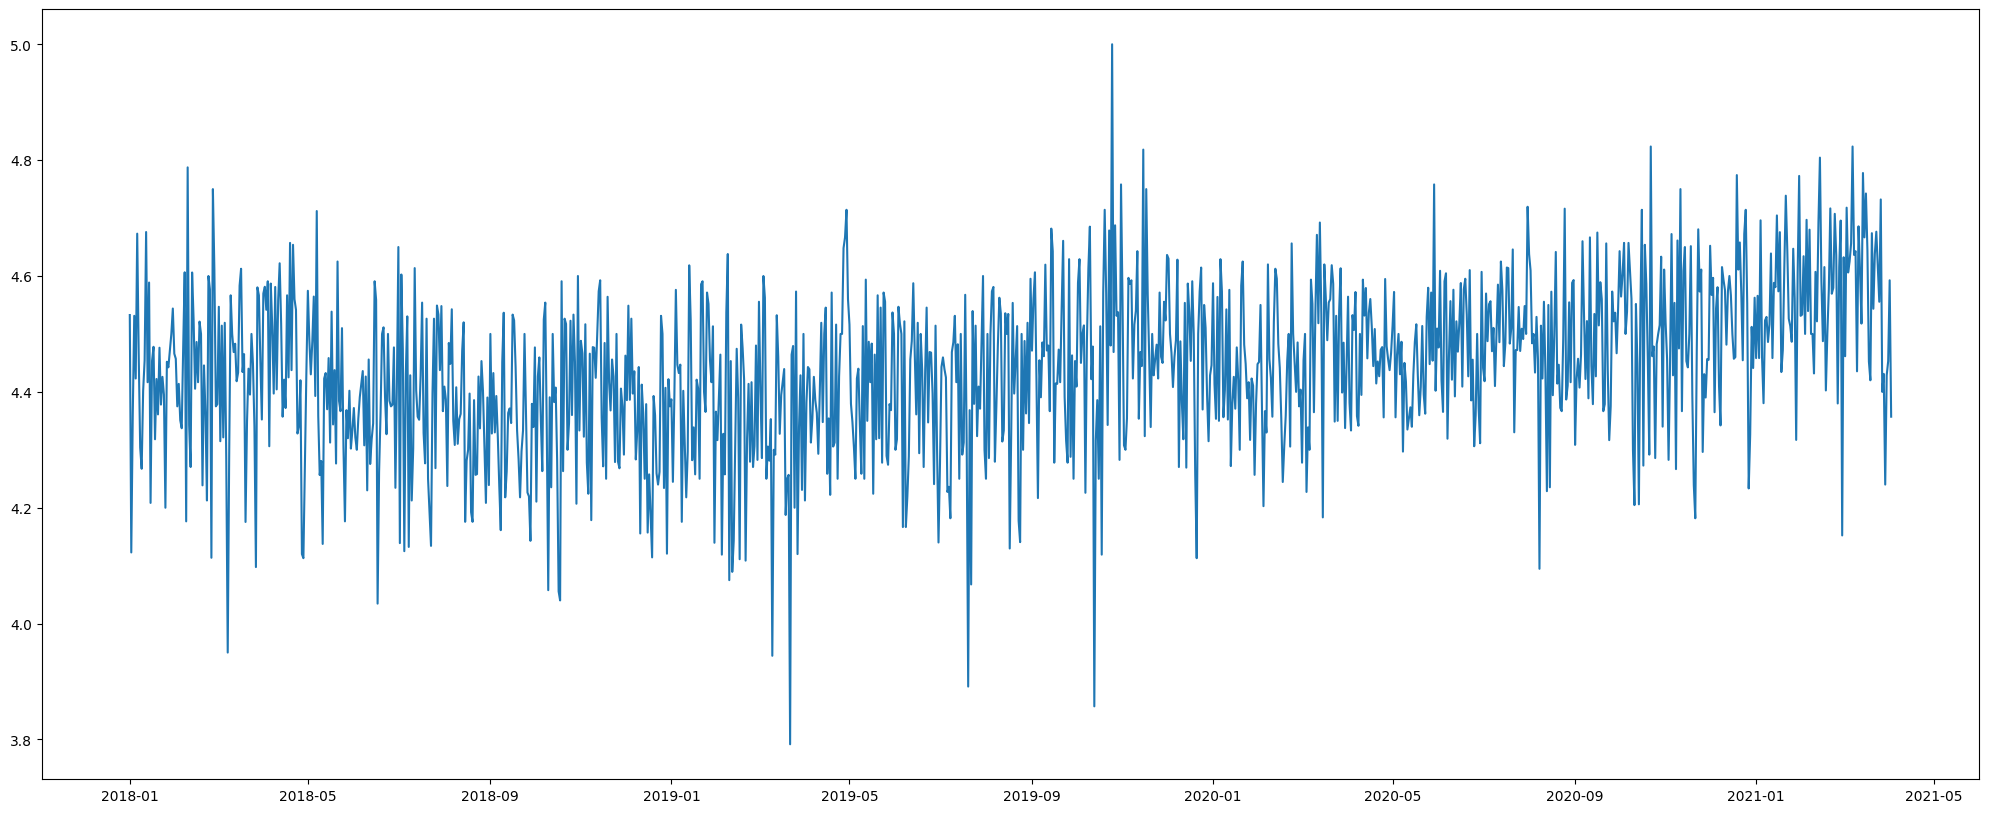

In [13]:
data['Day'] = data['Timestamp'].dt.date
day_average = data.groupby(['Day']).mean(numeric_only=True)

plt.figure(figsize=(25, 10))
plt.plot(day_average.index, day_average['Rating'])

### Rating average by week

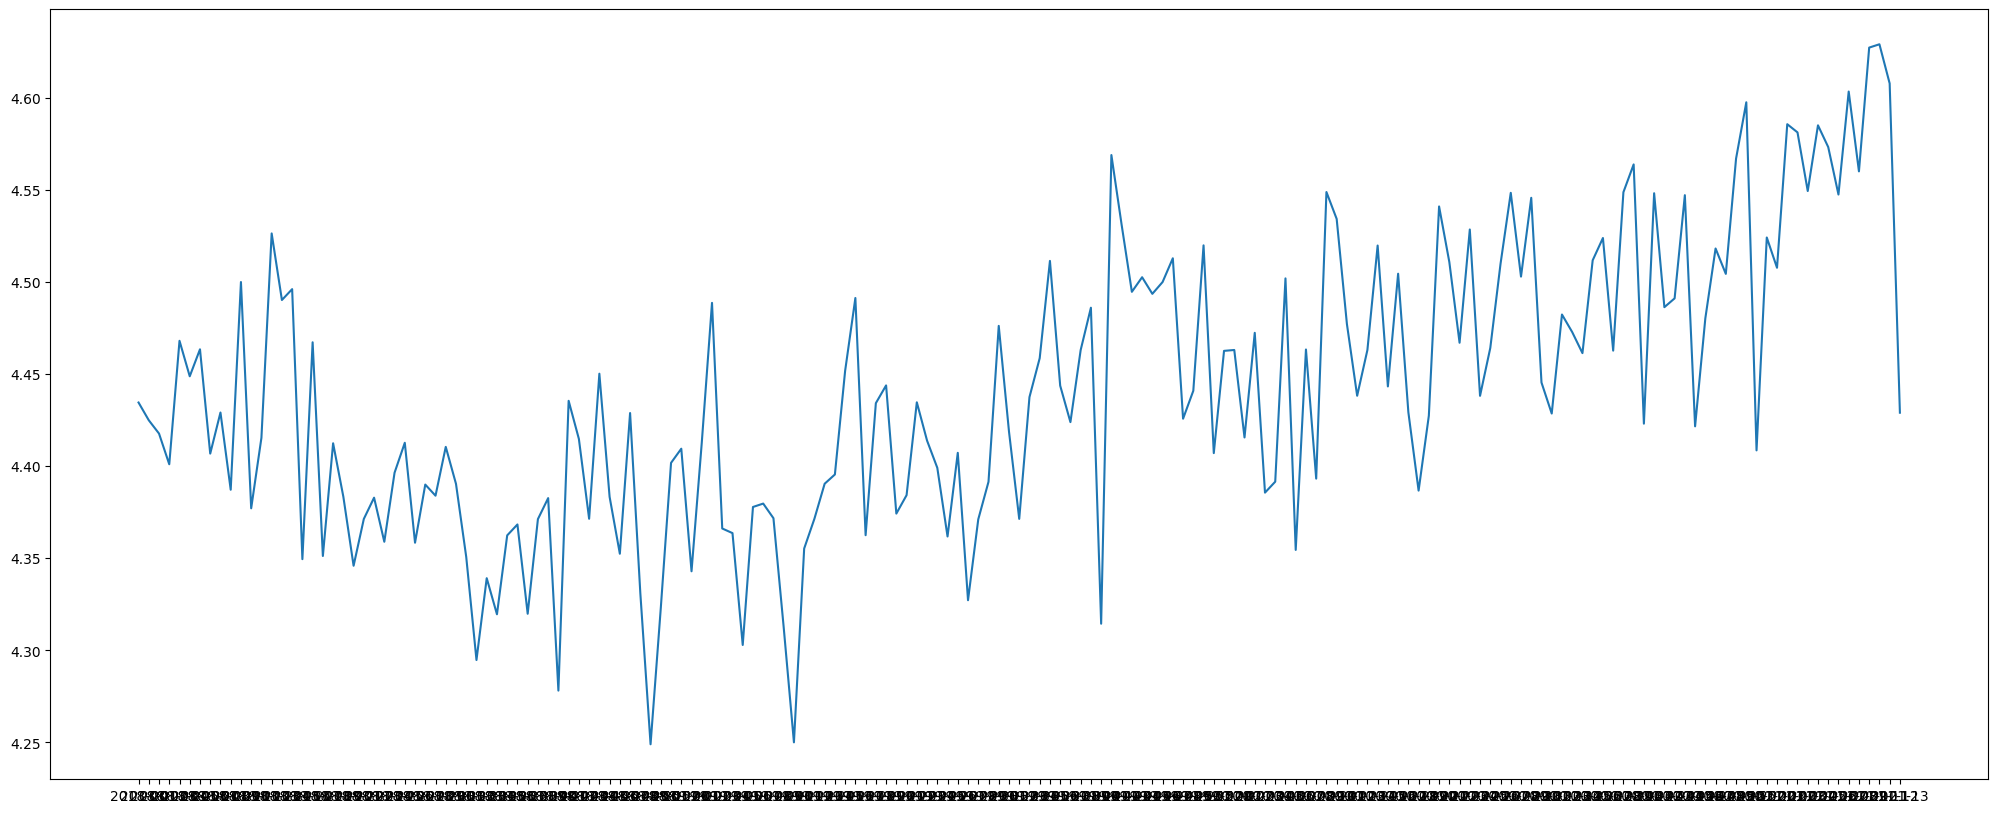

In [ ]:
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')
week_average = data.groupby(['Week']).mean(numeric_only=True)

plt.figure(figsize=(25, 10))
plt.plot(week_average.index, week_average['Rating'])

### Rating average by month

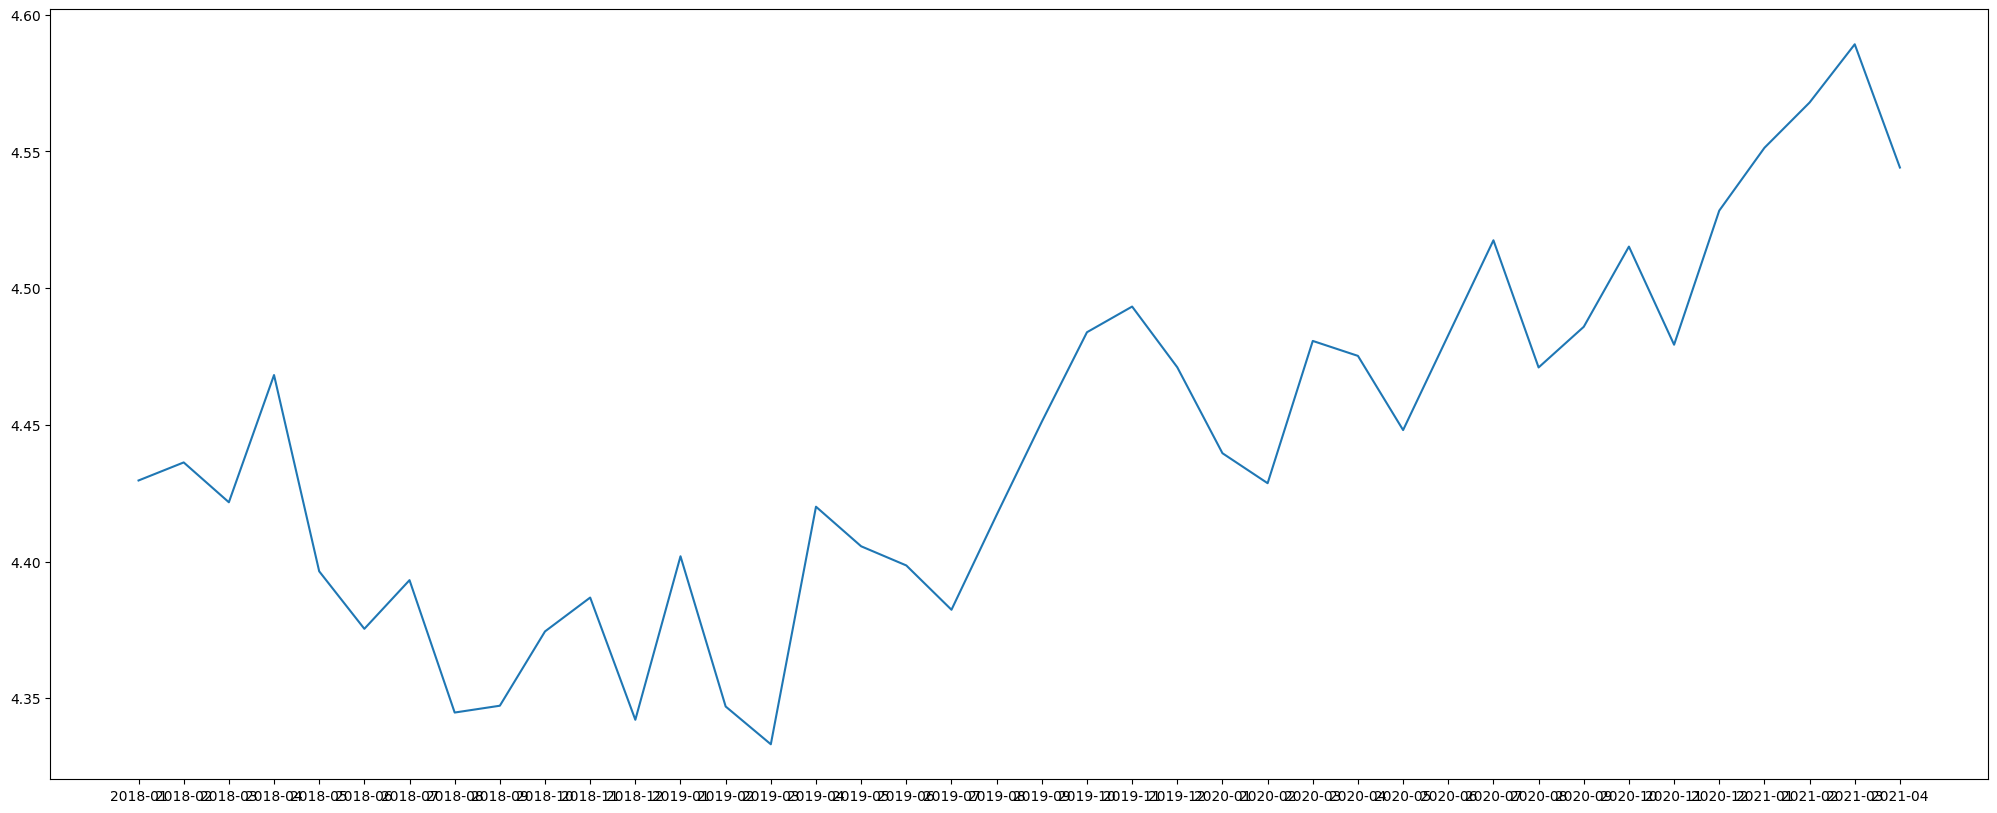

In [31]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average = data.groupby(['Month']).mean(numeric_only=True)

plt.figure(figsize=(25, 10))
plt.plot(month_average.index, month_average['Rating'])

### Average rating by month by course

<Axes: xlabel='Month'>

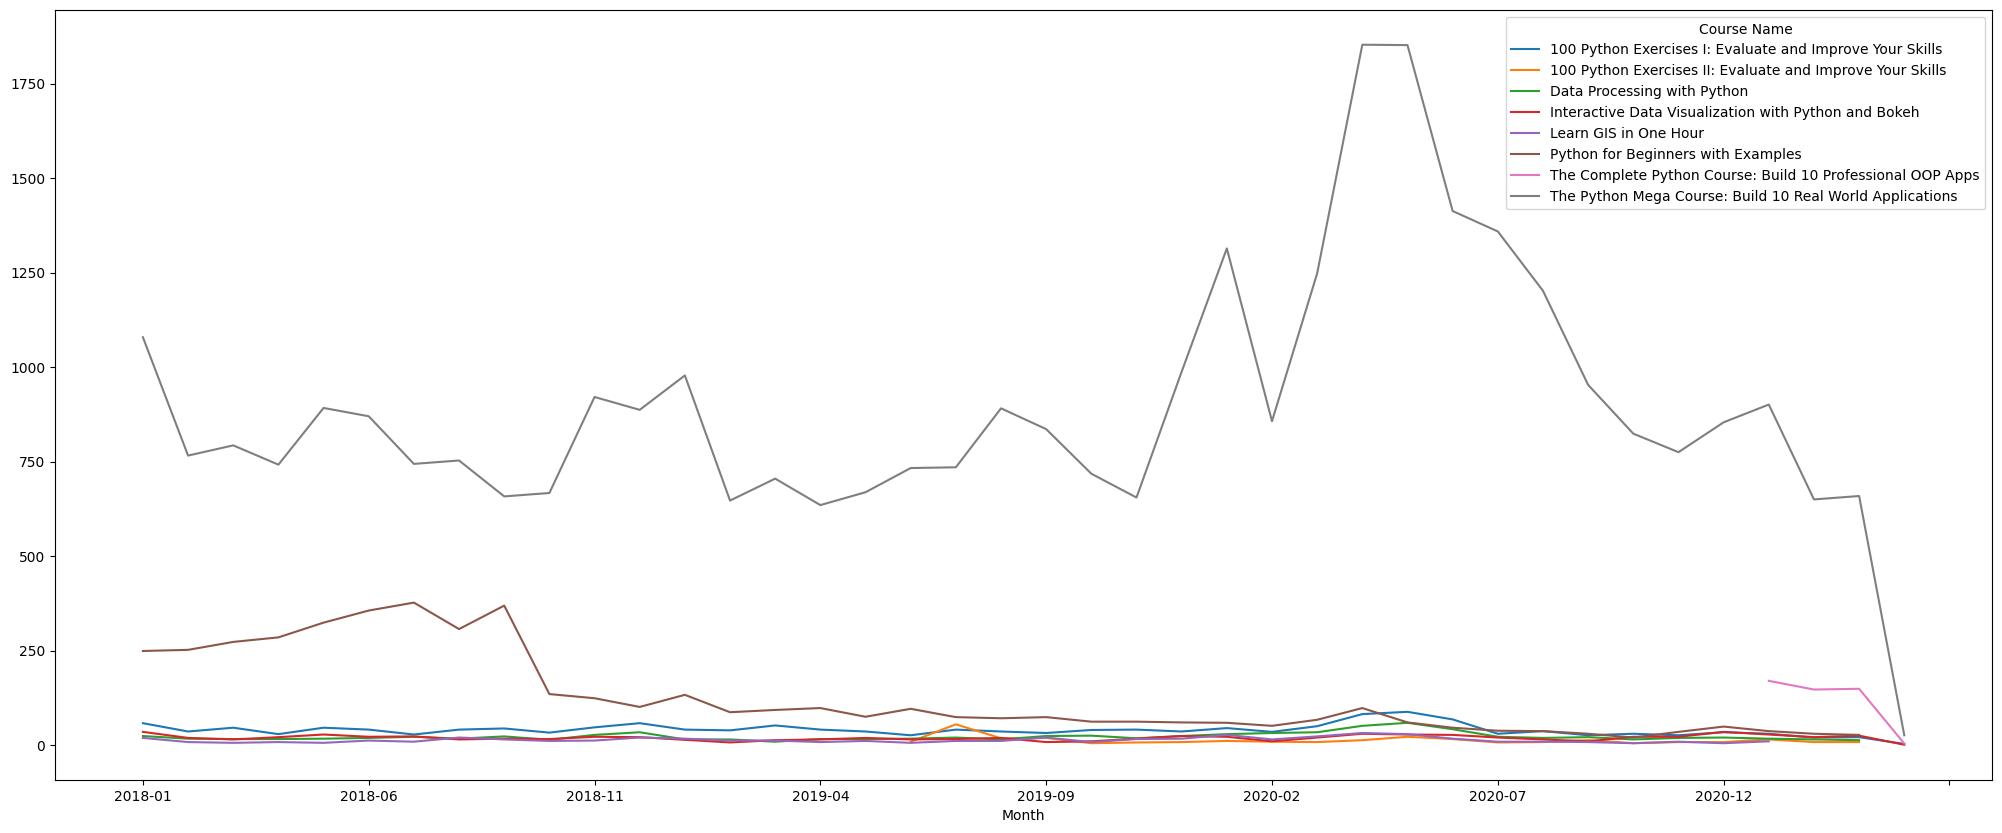

In [36]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_course = data.groupby(['Month', 'Course Name'])['Rating'].count().unstack()

month_average_course.plot(figsize=(25, 10))


### What day are people the happiest?

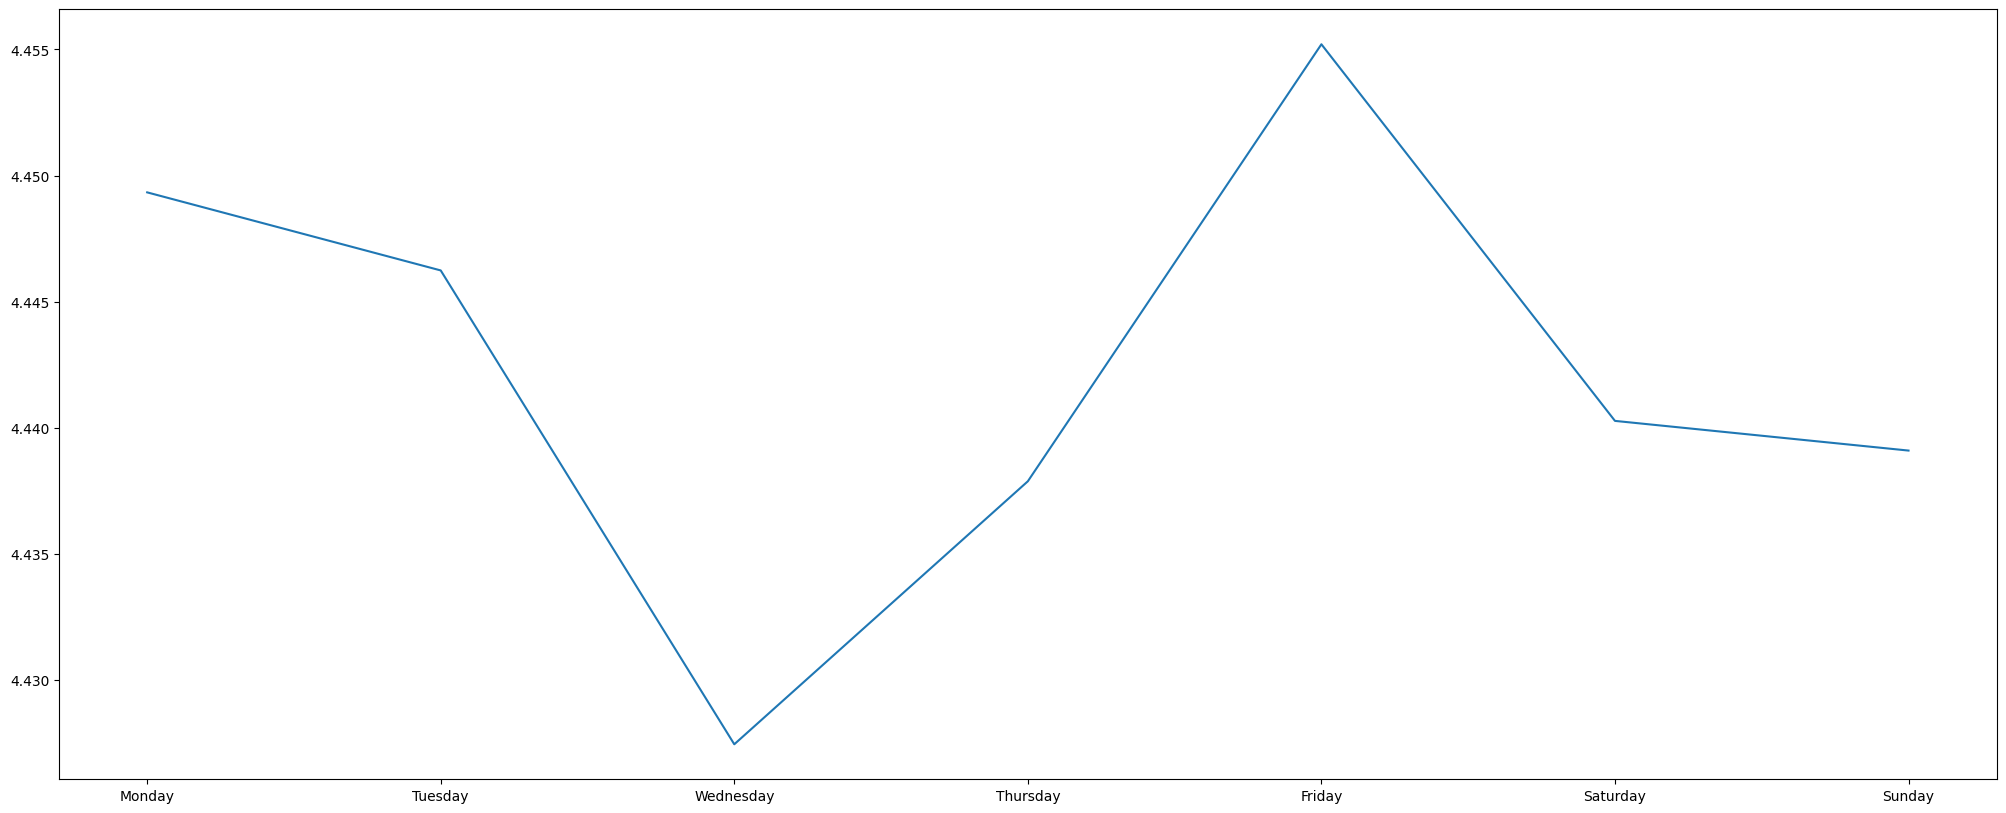

In [38]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
weekday_average = data.groupby(['Weekday']).mean(numeric_only=True).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(25, 10))
plt.plot(weekday_average.index, weekday_average['Rating'])

### Number of ratings by course using pie charts

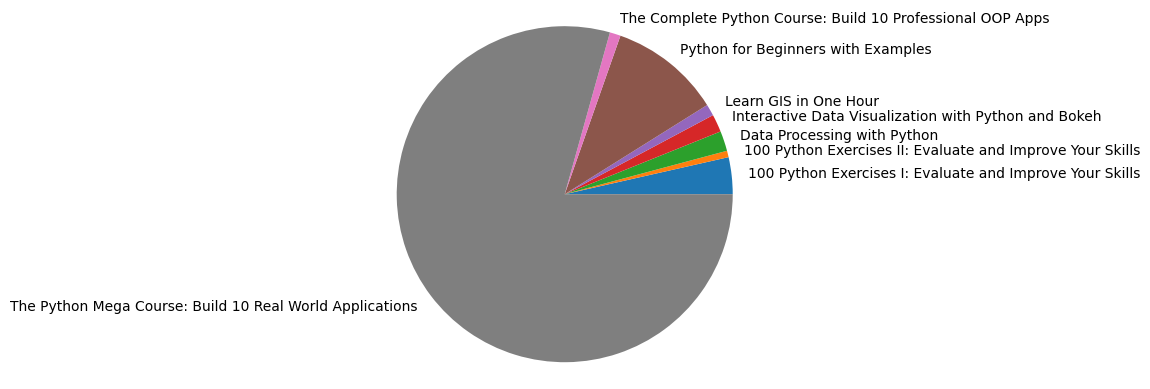

In [47]:
share = data.groupby(['Course Name'])['Rating'].count()
plt.pie(share, labels=share.index)
plt.axis('equal')
plt.show()